In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUI2016')

'/home/cusp/nm2565/PUI2016'

In [3]:
os.getenv('PUIDATA')

'/home/cusp/nm2565/PUIdata'

In [4]:
!curl -O 'https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.0M  100 22.0M    0     0  30.5M      0 --:--:-- --:--:-- --:--:-- 39.2M


In [5]:
!unzip 201512-citibike-tripdata.zip

Archive:  201512-citibike-tripdata.zip
replace 201512-citibike-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [6]:
df = pd.read_csv('201512-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1


In [7]:
df['date'] = pd.to_datetime(df['starttime'], format="%m/%d/%Y %H:%M:%S")
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1,2015-12-01 07:35:36
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1,2015-12-01 07:38:15
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1,2015-12-01 07:44:49
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1,2015-12-01 08:02:29
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1,2015-12-01 08:06:37


In [7]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [9]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'gender'], axis = 1, inplace = True)

In [10]:
df.head()

,birth year
0,1983.0
1,1975.0
2,1966.0
3,1985.0
4,1968.0


In [11]:
citibike_adj = df['birth year'] > 1940
df[citibike_adj].dropna().values

array([[ 1983.],
       [ 1975.],
       [ 1966.],
       ..., 
       [ 1959.],
       [ 1987.],
       [ 1968.]])

In [27]:
len(df[citibike_adj].dropna().values)

734834

In [12]:
age_cbusers = (2016 - df[citibike_adj].dropna().values).flatten()
age_cbusers

array([ 33.,  41.,  50., ...,  57.,  29.,  48.])

In [13]:
mean_cbusers = np.mean(age_cbusers)
mean_cbusers

39.629342137135737

In [14]:
std_cbusers = np.std(age_cbusers)
std_cbusers, mean_cbusers

(11.628533412808174, 39.629342137135737)

In [15]:
import scipy.stats

In [18]:
scipy.stats.kstest?

In [17]:
scipy.stats.kstest(age_cbusers, 'norm', args = (mean_cbusers, std_cbusers))

KstestResult(statistic=0.10008430090417741, pvalue=0.0)

(array([  4.90000000e+01,   1.42600000e+03,   1.61240000e+04,
          8.47610000e+04,   2.10186000e+05,   2.46210000e+05,
          1.35890000e+05,   3.56300000e+04,   4.29500000e+03,
          2.63000000e+02]),
 array([-14.67140229,  -4.25490139,   6.1615995 ,  16.57810039,
         26.99460129,  37.41110218,  47.82760308,  58.24410397,
         68.66060487,  79.07710576,  89.49360665]),
 <a list of 10 Patch objects>)

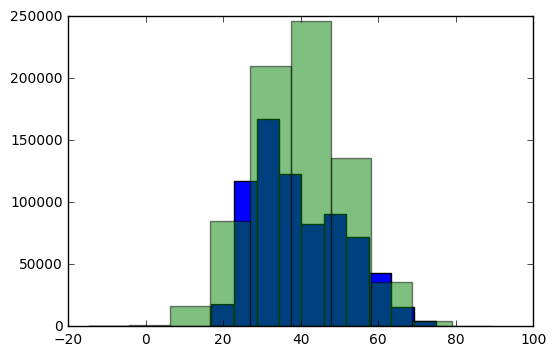

In [19]:
pl.hist(age_cbusers)
pl.hist(scipy.stats.norm.rvs(loc=mean_cbusers, scale=std_cbusers, size=len(age_cbusers)),alpha=0.5)

In [20]:
dir(scipy.stats)

['Tester',
 '__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betai',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisqprob',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'entropy',
 'erlang',
 'expon',
 'exponnorm',


In [28]:
scipy.stats.norm?

In [35]:
scipy.stats.kstest(age_cbusers, 'poisson', args = (mean_cbusers, std_cbusers))

KstestResult(statistic=0.55712241391250816, pvalue=0.0)

In [23]:
scipy.stats.norm.rvs?
#loc=0, scale=1, size=1, random_state=None

In [33]:
#pl.hist(age_cbusers)
#pl.hist(scipy.stats.poisson.rvs(loc=mean_cbusers, scale=std_cbusers, size=len(age_cbusers)),alpha=0.5)

In [30]:
scipy.stats.anderson(age_cbusers, 'norm')

AndersonResult(statistic=9281.4353490892099, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [31]:
scipy.stats.anderson(age_cbusers, 'logistic')

AndersonResult(statistic=9170.8358048273949, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

In [32]:
scipy.stats.kstest(age_cbusers, 'logistic', args = (mean_cbusers, std_cbusers))

KstestResult(statistic=0.17094267391665235, pvalue=0.0)

In [41]:
from collections import Counter
Counter(age_cbusers['birth year'])

new_age = pd.Dataframe(Counter(age_cbusers['birth year']), index = ('birth year', 'number')).T
count = new_age/len(new_age['birth year'])

pl.plot(count)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

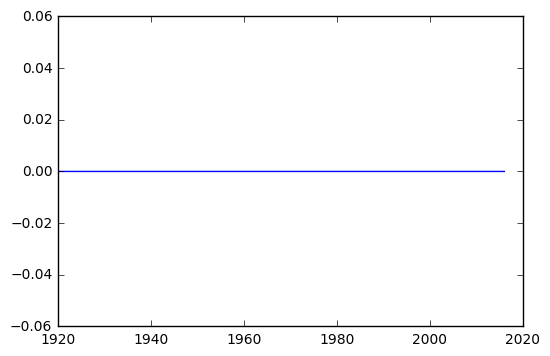

In [46]:
from scipy.stats import norm 

x = np.linspace(1920, 2016, 300000)
y = norm.pdf(x, loc = mean_cbusers, scale = std_cbusers)
pl.plot(x,y)